In [16]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [17]:
from dotenv import load_dotenv
load_dotenv()

True

In [23]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [24]:
pd.set_option("display.max_columns",None)

In [25]:
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AMGN","COST","TXN","NFLX","NVDA","ADBE","PEP","CMCSA","CSCO","INTC", "FB","GOOGL","AMZN","AAPL","MSFT",]

# Get 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

AAPL                                       ADBE  \
                             open    high     low   close     volume    open   
2020-04-27 00:00:00-04:00  281.80  284.54  279.95  283.25   52652760  348.80   
2020-04-28 00:00:00-04:00  285.08  285.83  278.20  278.57   24567863  353.09   
2020-04-29 00:00:00-04:00  284.73  289.67  283.89  287.83   57520384  339.53   
2020-04-30 00:00:00-04:00  289.96  294.53  288.35  293.99   34380486  348.01   
2020-05-01 00:00:00-04:00  286.25  299.00  285.85  289.07  112571771  347.24   

                                                                AMGN          \
                               high     low   close   volume    open    high   
2020-04-27 00:00:00-04:00  349.9600  345.12  348.48  3891356  236.63  243.00   
2020-04-28 00:00:00-04:00  353.4500  332.57  333.45  3492297  243.00  244.95   
2020-04-29 00:00:00-04:00  351.2500  335.44  349.16  8456359  238.90  239.31   
2020-04-30 00:00:00-04:00  356.2300  346.55  353.34  2931162  236.02  240.07   
2020-05-01 00:00:00-04:00  350.3099  340.26  344.20  4379422  233.00  237.05   

                                                       AMZN           \
                              low   close   volume     open     high   
2020-04-27 00:00:00-04:00  235.00  242.44  4042344  2443.20  2444.88   
2020-04-28 00:00:00-04:00  236.86  237.63  2111233  2372.10  2373.50   
2020-04-29 00:00:00-04:00  235.24  235.69  5251624  2330.01  2391.89   
2020-04-30 00:00:00-04:00  231.91  239.06  3912426  2419.84  2471.50   
2020-05-01 00:00:00-04:00  228.00  230.97  5009522  2336.80  2362.44   

                                                         CMCSA          \
                                 low    close    volume   open    high   
2020-04-27 00:00:00-04:00  2363.0000  2376.82  10185891  37.57  38.345   
2020-04-28 00:00:00-04:00  2306.0000  2314.08   4643171  38.63  39.065   
2020-04-29 00:00:00-04:00  2310.0000  2371.88   7930384  38.82  39.120   
2020-04-30 00:00:00-04:00  2396.0100  2471.50   6873149  36.51  38.035   
2020-05-01 00:00:00-04:00  2258.1902  2285.94  18176321  37.14  37.510   

                                                        COST            \
                              low   close    volume     open      high   
2020-04-27 00:00:00-04:00  37.400  38.220  63905817  313.050  313.2900   
2020-04-28 00:00:00-04:00  37.910  38.080  26545170  310.825  311.2700   
2020-04-29 00:00:00-04:00  38.350  39.010  31706126  304.950  308.6832   
2020-04-30 00:00:00-04:00  36.010  37.625  54088768  306.150  307.8950   
2020-05-01 00:00:00-04:00  36.775  36.980  16731142  301.780  304.8199   

                                                         CSCO           \
                                low   close   volume     open     high   
2020-04-27 00:00:00-04:00  307.5900  308.67  8168992  42.7000  43.2200   
2020-04-28 00:00:00-04:00  304.2800  304.86  4378791  43.5000  43.6250   
2020-04-29 00:00:00-04:00  301.1206  307.09  6561442  43.3460  43.4800   
2020-04-30 00:00:00-04:00  302.5700  303.01  4777980  43.1654  43.1677   
2020-05-01 00:00:00-04:00  300.1800  301.92  2027707  41.7200  41.8100   

                                                         FB                    \
                              low  close    volume     open    high       low   
2020-04-27 00:00:00-04:00  42.580  43.07  53318525  192.657  193.75  187.4100   
2020-04-28 00:00:00-04:00  42.410  42.48  26578123  188.660  189.20  182.5600   
2020-04-29 00:00:00-04:00  42.930  43.35  26095806  190.930  196.91  190.0000   
2020-04-30 00:00:00-04:00  42.170  42.35  41250557  206.920  209.69  201.5701   
2020-05-01 00:00:00-04:00  40.765  40.96  18041784  201.600  207.28  199.0501   

                                                GOOGL                    \
                            close     volume     open     high      low   
2020-04-27 00:00:00-04:00  187.54  106374064  1292.00  1294.10  1265.06   
2020-04-28 00:00:00-04:00  182.86   35867080  1283.2

In [26]:
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = 500,
    num_trading_days = 252*20
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
2015-05-01 00:00:00-04:00  126.09  130.13  125.30  128.95  50577124   
2015-05-04 00:00:00-04:00  129.50  130.57  128.26  128.70  42252232   
2015-05-05 00:00:00-04:00  128.15  128.45  125.78  125.81  42001432   
2015-05-06 00:00:00-04:00  126.56  126.75  123.36  125.08  63474106   
2015-05-07 00:00:00-04:00  124.76  126.08  124.02  125.25  37264138   

                                         ADBE                                \
                          daily_return   open   high    low  close   volume   
2015-05-01 00:00:00-04:00          NaN  76.29  76.67  75.66  76.41  1376832   
2015-05-04 00:00:00-04:00    -0.001939  76.43  76.99  75.82  75.86  1325337   
2015-05-05 00:00:00-04:00    -0.022455  75.35  75.63  74.75  75.00  1747846   
2015-05-06 00:00:00-04:00    -0.005802  75.08  75.47  73.96  74.49  1678811   
2015-05-07 00:00:00-04:00     0.001359  74.42  74.84  74.17  74.73  1666617   

                                          AMGN                            \
                          daily_return    open      high     low   close   
2015-05-01 00:00:00-04:00          NaN  146.85  159.8899  146.07  147.52   
2015-05-04 00:00:00-04:00    -0.007198  148.57  150.8300  148.52  149.13   
2015-05-05 00:00:00-04:00    -0.011337  148.52  149.2500  146.54  146.67   
2015-05-06 00:00:00-04:00    -0.006800  146.89  147.5600  144.12  146.22   
2015-05-07 00:00:00-04:00     0.003222  146.47  158.1600  144.83  157.90   

                                                   AMZN                    \
                            volume daily_return    open      high     low   
2015-05-01 00:00:00-04:00  2831240          NaN  423.82  425.6400  416.00   
2015-05-04 00:00:00-04:00  2463828     0.010914  424.85  429.7700  422.42   
2015-05-05 00:00:00-04:00  2703828    -0.016496  423.40  427.5100  421.02   
2015-05-06 00:00:00-04:00  3158127    -0.003068  421.29  422.7165  414.55   
2015-05-07 00:00:00-04:00  3754059     0.079880  423.82  428.5000  422.85   

                                                          CMCSA          \
                            close   volume daily_return    open    high   
2015-05-01 00:00:00-04:00  422.87  2837446          NaN  28.900  29.245   
2015-05-04 00:00:00-04:00  423.03  1634416     0.000378  30.025  30.050   
2015-05-05 00:00:00-04:00  421.18  2237395    -0.004373  13.960  29.225   
2015-05-06 00:00:00-04:00  419.12  2032361    -0.004891  29.045  29.150   
2015-05-07 00:00:00-04:00  426.96  2152603     0.018706  28.750  29.115   

                                                                    COST  \
                              low   close    volume daily_return    open   
2015-05-01 00:00:00-04:00  28.660  29.190  26873342          NaN  143.46   
2015-05-04 00:00:00-04:00  29.315  29.390  37741202     0.006852  145.39   
2015-05-05 00:00:00-04:00  13.815  28.990  42985148    -0.013610  145.12   
2015-05-06 00:00:00-04:00  28.660  28.835  26994886    -0.005347  145.20   
2015-05-07 00:00:00-04:00  13.710  13.750  30374236    -0.523149  144.52   

                                                                           \
                               high     low   close   volume daily_return   
2015-05-01 00:00:00-04:00  145.7400  143.22  145.40  1114297          NaN   
2015-05-04 00:00:00-04:00  146.2100  144.61  145.74   996499     0.002338   
2015-05-05 00:00:00-04:00  145.7400  144.29  144.53  1253146    -0.008302   
2015-05-06 00:00:00-04:00  145.8400  144.01  144.77  1346423     0.001661   
2015-05-07 00:00:00-04:00  145.6099  144.01  144.57  1601108    -0.001382   

                            CSCO                                     \
                            open    high      low   close    volume   
2015-05-01 00:00:00-04:00  28.81  29.200  28.7800  29.115  16836966   
2015-05-04 00:00:00-04:00  29.10  29.360  29.0700  29.160  14303686   
2015-05-05 00:00:00-0

In [29]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013524,1.010409,1.017925,0.970887,0.990953,0.973777,0.976045,1.024166,1.027706,1.012120,1.001570e+00,0.970406,1.053430,0.996091,1.006308,0.985582,1.029966,0.975746,0.992301,0.950612,0.982573,0.985618,0.981238,1.033054,1.009267,1.023451,1.031198,1.023677,0.978484,1.012646,0.966560,0.995523,1.000139,1.006513,0.999364,0.956165,1.003176,1.034301,1.016214,1.005442,1.005854,0.938152,0.984015,0.983037,1.041241,1.004845,1.008710,1.020886,0.948093,1.000376,0.990563,0.998829,1.043631,0.960931,1.018747,1.000390,1.001767,1.011589,1.000443,0.966501,1.019092,0.994573,1.035429,0.971496,1.055329,1.047740,0.986286,1.044381,1.013373,1.006192,0.975070,1.025481,1.004599,0.987408,1.013827,0.982978,1.059205,1.008910,0.993568,1.004415,0.965404,0.967397,1.006989,1.010951,1.031075,1.000373,1.019142,0.957220,1.019112,1.022011,0.996917,0.991086,0.986244,1.041106,1.000674,0.993913,1.024702,1.018865,0.965808,0.990424
2,1.079974,1.031898,1.035076,0.990059,0.983639,1.014549,0.952591,1.039396,1.042645,0.995378,9.411007e-01,0.975345,1.055450,1.001689,1.045045,1.003052,1.041477,0.999530,1.010912,0.983797,0.984988,1.017349,0.974735,1.015278,1.030478,1.035530,1.012322,1.024616,1.016409,1.002990,0.933597,0.961445,1.062693,1.021511,0.988993,0.935511,1.013792,1.060640,1.010880,1.039876,1.011358,0.948240,1.019268,0.987508,1.058277,1.006871,0.992248,0.995537,0.946062,1.013181,0.982679,1.003883,1.042849,0.988163,1.000709,1.003182,0.966676,1.025339,1.007357,0.946763,1.045903,1.016280,1.016242,0.986754,1.063815,1.050737,0.968657,1.070576,1.001520,1.033167,0.979682,1.036588,1.056285,1.009215,0.967407,0.951927,1.053065,0.986688,1.052511,0.974964,0.971907,0.974260,1.022734,0.992977,1.035095,1.011489,1.016838,0.974354,1.022863,1.021145,1.007938,1.029493,1.013556,1.005669,1.009955,0.961929,1.012686,1.047353,0.935560,0.952494
3,1.075590,1.046587,1.079390,1.019036,0.996173,1.027284,0.907975,1.045067,1.017595,1.007244,9.492836e-01,0.942511,1.103998,1.014277,1.052125,1.002221,1.058003,0.990629,1.049641,0.961303,0.960911,1.002965,0.992598,0.995398,1.005745,0.999375,0.985777,1.054470,1.012634,1.020029,0.959193,0.981153,1.120345,1.049710,0.979054,0.943436,1.018527,1.015255,1.028375,1.038470,0.998948,0.927082,1.044841,0.984920,1.091514,1.048568,0.993159,0.969071,0.965371,1.010758,0.971271,1.010782,1.033384,0.990345,0.995865,1.002279,1.012815,1.052627,1.000761,0.925786,1.060782,0.989678,1.036039,1.002216,1.080278,1.032999,0.920900,1.028605,0.997082,1.019452,0.986429,1.028028,1.067517,1.019362,0.958608,0.953091,1.069220,0.989881,1.027597,0.963623,0.942630,1.012254,1.065926,1.011502,1.036486,1.065366,1.013765,0.952185,1.013270,1.050478,1.025492,1.030750,0.999796,0.984658,1.037637,0.976709,1.031541,1.075122,0.950488,0.894741
4,1.098028,1.054373,1.096496,1.044070,0.945114,1.002945,0.870499,1.045292,0.998901,1.

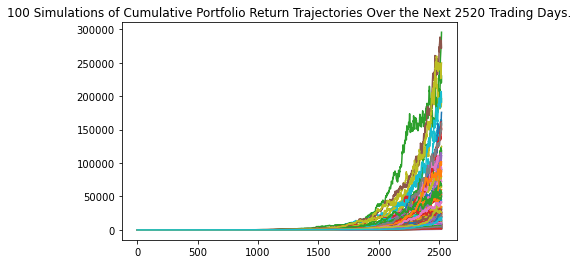

In [28]:
line_plot = MC_even_dist.plot_simulation()